# Should a price change be adopted?

# Problem
A company is running an A/B test where they have changed the price for a product from $39 (control) to $59. Should the company keep that price or change it back to the old price?

# The Data
The data is contained in two .csv datasets. 
1. A user table with information about the user who clicked an ad for the product (ID, city, device), as well as which test they belong to, and whether they purchased the product.
2. A test results table which contains data for each ad click through, i.e., timestamp, source, device, as well as which test the user belongs to, and whether they purchased the product.

# My Solution

I calculated revenue per visitor for users in both test groups, and then split the data into 1 of 12 weeks. Then I ran a t-test between the two groups to test for a significant difference

# Results

Overall, although conversion rates decreased for the $59 product, the revenue per visit increased from $0.77 to $0.91. This result was significant (p < 0.00001). 

# Actionable advice

If the company cares about optimizing profit margin, the product price should not change. If the company cares more about raw conversion rates, that is if they care more about widely distributing their product in the short-term to improve consumer recognition, and do not care as much about optimizing profit margins, then the price should not change.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
user = pd.read_csv('/home/rubisco/Desktop/data-challenges/pricing/user_table.csv')
test = pd.read_csv('/home/rubisco/Desktop/data-challenges/pricing/test_results.csv')

In [3]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [4]:
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [5]:
# How many users actually ended up purchasing the product

pd.DataFrame(test['converted'].value_counts())

,converted
0,310992
1,5808


In [6]:
# Extract Y-M-D from the timestamp column

arry = []
for element in test['timestamp']:
    x = element.split()
    arry.append(pd.to_datetime(x[0]))

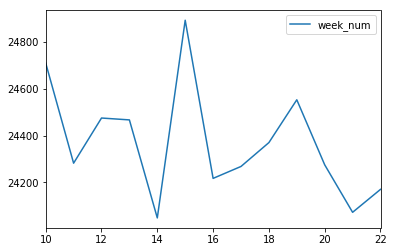

In [13]:
# Add Week Number to "test" dataframe and plotting total number of hits by week number. 

df = pd.DataFrame(arry, columns=['week_num'])
week_num = pd.DataFrame(df['week_num'].dt.week)
test1 = test.join(week_num)
x = pd.DataFrame(test1['week_num'].value_counts()).sort_index(ascending=True)
x.plot();

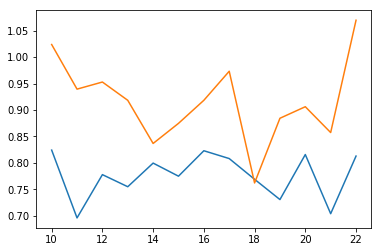

In [24]:
control = test1.loc[test1['test'] == 0]
exp = test1.loc[test1['test'] == 1]
control_sum = pd.DataFrame(control.groupby(['week_num']).sum()['converted']/control.groupby(['week_num']).count()['converted']).reset_index()
exp_sum = pd.DataFrame(exp.groupby(['week_num']).sum()['converted']/exp.groupby(['week_num']).count()['converted']).reset_index()
control_rev = pd.DataFrame(39*control_sum['converted'])
exp_rev = pd.DataFrame(59*exp_sum['converted'])
plt.plot(control_sum['week_num'], control_rev, control_sum['week_num'], exp_rev);

In [41]:
# Putting weekly revenue totals 

con = np.array(control_rev['converted'])
exp = np.array(exp_rev['converted'])
print('Experimental mean RPV = ' + str(exp.mean()))
print('Control mean RPV = ' + str(con.mean()))

Experimental mean RPV = 0.9167368386492952
Control mean RPV = 0.7761814131940039


In [33]:
# Perform t-test to detect significant difference between weekly control and experimental revenues

N = len(con)
var_con = con.var(ddof=1)
var_exp = exp.var(ddof=1)
s = np.sqrt((var_con + var_exp)/2)
t = (exp.mean() - con.mean())/(s*np.sqrt(2/N))
df = 2*N - 1
p = 1 - stats.t.cdf(t,df=df)
print('p-value = ' + str(p))

p-value = 4.489364481718994e-06
